### Coding with Qiskit Episode 4

# Quantum Gates in Qiskit

In this episode of Coding with Qiskit, we learned about quantum gates available in Qiskit and some techniques of understanding how the gates work in quantum circuits.

The four representations of the action of quantum gates discussed in the video are:

1. Bra-Ket notation
2. Matrix representation
3. Bloch sphere picture
4. Measurement results

This Jupyter notebook shows the code that was used in the video, as well as updates in the latest version of Qiskit.

**Link to Episode 4:** https://www.youtube.com/watch?v=tBnWG_95F9c

In [1]:
from IPython.display import IFrame
IFrame(src="http://www.youtube.com/embed/tBnWG_95F9c", width=1920/2, height=1080/2)

# 1. Bra-Ket notation

Throughout the literature, you will find quantum states written in the Bra-Ket notation. In this notation, the quantum states of our qubits are written as superpositions of $\vert0\rangle$ and $\vert1\rangle$.

In the video, we used the particular example of the $X$ gate, whose action is 

$X\vert0\rangle = \vert1\rangle$

$X\vert1\rangle = \vert0\rangle$


# 2. Matrix representation

The matrix representation of the example above is given as

$$\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$
and
$$\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

The 2x2 matrix above is exactly the $X$ gate in matrix representation.

Here is a method that you can use to determine the matrix representation of the $X$ gate. We build a circuit which contains the gate of interest and execute that circuit using the `unitary_simulator`.

In [2]:
from qiskit import *
circuit = QuantumCircuit(1,1)
circuit.x(0)

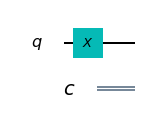

In [3]:
%matplotlib inline
circuit.draw(output='mpl')

In [4]:
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend=simulator).result()
unitary = result.get_unitary()
print(unitary)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In order to determine the quantum state at the output, you can use the `statevector_simulator`

In [5]:
from qiskit import *
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.+0.j 1.+0.j]


As you can see from these two results, we have determined the matrix representation of the $X$ gate, as well as its action on the $\vert0\rangle$ state.

# 3. Bloch sphere picture

The action of a unitary quantum gate on the state of a qubit can be thought of as a rotation on the surface of the Bloch sphere, which is a sphere of radius 1.

You can visualize the `statevector` output from the above code by using the following code

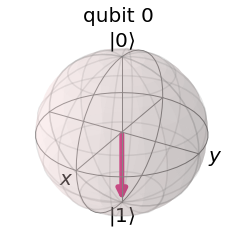

In [6]:
# in the video, we imported from qiskit.tools.visualization. 
# this part of Qiskit has been moved to qiskit.visualization, and we recommend using qiskit.visualization instead
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

# 4. Measurement results

The final method of understanding how a gate works is by using measurement results from running a circuit with
the gate using the `qasm_simulator`. You can do this by running the code below.

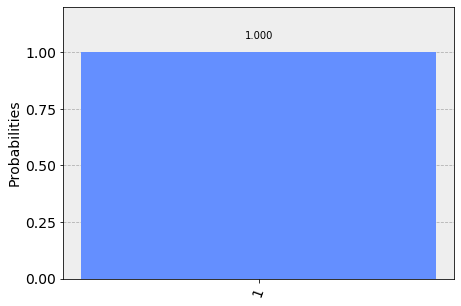

In [7]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.measure([0], [0])
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

As you can see above, the result is that 100% of the 1024 shots returned 1.

# References

For detailed information about Qiskit, check out the tutorials in the Github repository:

https://github.com/Qiskit/qiskit-iqx-tutorials

For a pedagogical presentation of the Bra-Ket notation and the matrix algebra involved in quantum circuits, check out our open-source `Learn Quantum Computation using Qiskit` textbook:

https://community.qiskit.org/textbook/

For an overview of all gates in Qiskit, see:

https://quantum-computing.ibm.com/support/guides/gate-overview

# Version

It's good to note the Qiskit version that was used in your work. One way to do this is print the version at the bottom of the Jupyter notebook using

In [8]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.2'}

In [9]:
import qiskit.tools.jupyter
%qiskit_copyright